# ML ALGORITHM SELECTION

## Importing necessary libraries and loading data

In [43]:
#The usual culprits for data exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Prep and Hyperparameter Tuning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV



#ML Regression Algorithms to find a good model fit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoCV


#Evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#Just in case the data is imbalanced
from imblearn.over_sampling import SMOTE

#Picling the model
import pickle

#Directory change
import os
os.chdir("/Users/oanottage/Desktop/BTS/BDI/Final_Project/")

In [33]:
raw = pd.read_csv("Data_Lake/Silver_Layer/Combined_Data.csv", parse_dates=['date'])

In [34]:
df = raw.copy()

In [35]:
df.head()

,date,respondent,respondent-name,type,type-name,timezone,timezone-description,value_energy,value-units,datatype,station,attributes,value_weather
0,2023-01-01,FMPP,Florida Municipal Power Pool,DF,Day-ahead demand forecast,Eastern,Eastern,42020,megawatthours,TMAX,GHCND:USC00280907,",,7,0700",94
1,2023-01-01,FMPP,Florida Municipal Power Pool,DF,Day-ahead demand forecast,Eastern,Eastern,42020,megawatthours,TMAX,GHCND:USC00281335,",,7,0700",111
2,2023-01-01,FMPP,Florida Municipal Power Pool,DF,Day-ahead demand forecast,Eastern,Eastern,42020,megawatthours,TMAX,GHCND:USC00283704,",,7,0700",117
3,2023-01-01,FMPP,Florida Municipal Power Pool,DF,Day-ahead demand forecast,Eastern,Eastern,42020,megawatthours,TMAX,GHCND:USC00284987,",,7,0630",133
4,2023-01-01,FMPP,Florida Municipal Power Pool,DF,Day-ahead demand forecast,Eastern,Eastern,42020,megawatthours,TMAX,GHCND:USC00301309,",,7,0700",122


## Data Exploration & Cleaning

In [36]:
df.describe()

,date,value_energy,value_weather
count,658915,6.589150e+05,658915.000000
mean,2023-01-16 00:13:48.052176384,3.433585e+05,88.646118
min,2023-01-01 00:00:00,-2.015170e+05,6.000000
25%,2023-01-08 00:00:00,6.542000e+03,56.000000
50%,2023-01-16 00:00:00,4.062600e+04,89.000000
75%,2023-01-24 00:00:00,2.727120e+05,122.000000
max,2023-01-31 00:00:00,1.227462e+07,194.000000
std,NaN,1.184452e+06,37.638335


In [37]:
df.describe(include=['object'])

,respondent,respondent-name,type,type-name,timezone,timezone-description,value-units,datatype,station,attributes
count,658915,658915,658915,658915,658915,658915,658915,658915,658915,658915
unique,76,76,4,4,5,5,1,1,15,6
top,FMPP,Florida Municipal Power Pool,NG,Net generation,Pacific,Pacific,megawatthours,TMAX,GHCND:USC00280907,",,W,2400"
freq,9240,9240,175560,175560,131819,131819,658915,658915,44213,221065


In [41]:
df['attributes'].value_counts()

attributes
,,W,2400    221065
,,7,0700    176852
,,W,        132639
,,7,0630     44213
,,7,0800     42788
,,7,         41358
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658915 entries, 0 to 658914
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  658915 non-null  datetime64[ns]
 1   respondent            658915 non-null  object        
 2   respondent-name       658915 non-null  object        
 3   type                  658915 non-null  object        
 4   type-name             658915 non-null  object        
 5   timezone              658915 non-null  object        
 6   timezone-description  658915 non-null  object        
 7   value_energy          658915 non-null  int64         
 8   value-units           658915 non-null  object        
 9   datatype              658915 non-null  object        
 10  station               658915 non-null  object        
 11  attributes            658915 non-null  object        
 12  value_weather         658915 non-null  int64         
dtyp

In [7]:
# Remove value and datatype (only one value), not necessary
df_combined = df.drop(columns=['value-units','datatype', 'type','timezone-description', 'date', 'respondent','respondent-name'])

In [8]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658915 entries, 0 to 658914
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   type-name      658915 non-null  object
 1   timezone       658915 non-null  object
 2   value_energy   658915 non-null  int64 
 3   station        658915 non-null  object
 4   attributes     658915 non-null  object
 5   value_weather  658915 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 30.2+ MB


In [9]:
#Check for any duplicate rows
df_combined[df_combined.duplicated() == True]

,type-name,timezone,value_energy,station,attributes,value_weather
390,Day-ahead demand forecast,Eastern,937492,GHCND:USC00280907,",,7,0700",94
391,Day-ahead demand forecast,Eastern,937492,GHCND:USC00281335,",,7,0700",111
392,Day-ahead demand forecast,Eastern,937492,GHCND:USC00283704,",,7,0700",117
393,Day-ahead demand forecast,Eastern,937492,GHCND:USC00284987,",,7,0630",133
394,Day-ahead demand forecast,Eastern,937492,GHCND:USC00301309,",,7,0700",122
...,...,...,...,...,...,...
658371,Demand,Mountain,434332,GHCND:USW00094728,",,W,2400",100
658372,Demand,Mountain,434332,GHCND:USW00094741,",,W,",89
658373,Demand,Mountain,434332,GHCND:USW00094745,",,W,2400",78
658374,Demand,Mountain,434332,GHCND:USW00094789,",,W,2400",72


In [10]:
df_combined.describe(include=['object'])

,type-name,timezone,station,attributes
count,658915,658915,658915,658915
unique,4,5,15,6
top,Net generation,Pacific,GHCND:USC00280907,",,W,2400"
freq,175560,131819,44213,221065


## Visualizations for identifying patterns and relationships

### Box Plots (for Outliers)

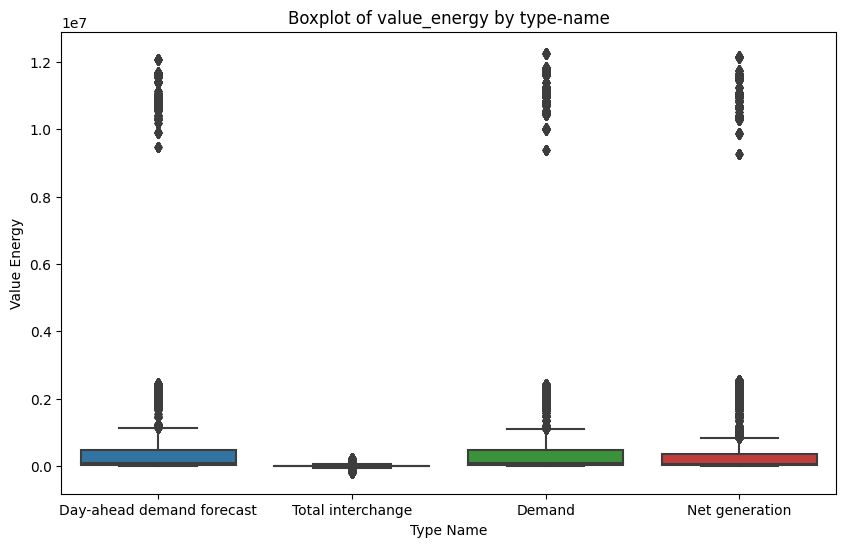

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='type-name', y='value_energy', data=df_combined, ax=ax)
plt.title('Boxplot of value_energy by type-name')
plt.xlabel('Type Name')
plt.ylabel('Value Energy')
plt.show()

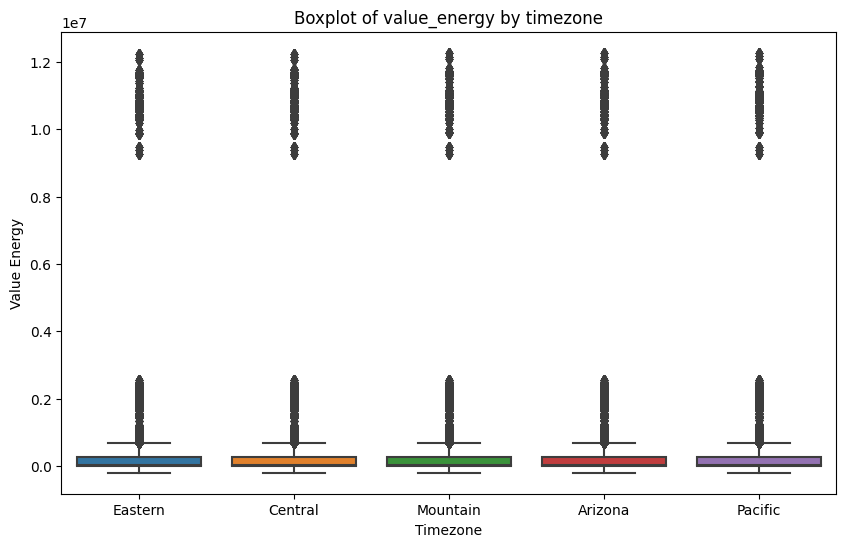

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='timezone', y='value_energy', data=df_combined, ax=ax)
plt.title('Boxplot of value_energy by timezone')
plt.xlabel('Timezone')
plt.ylabel('Value Energy')
plt.show()

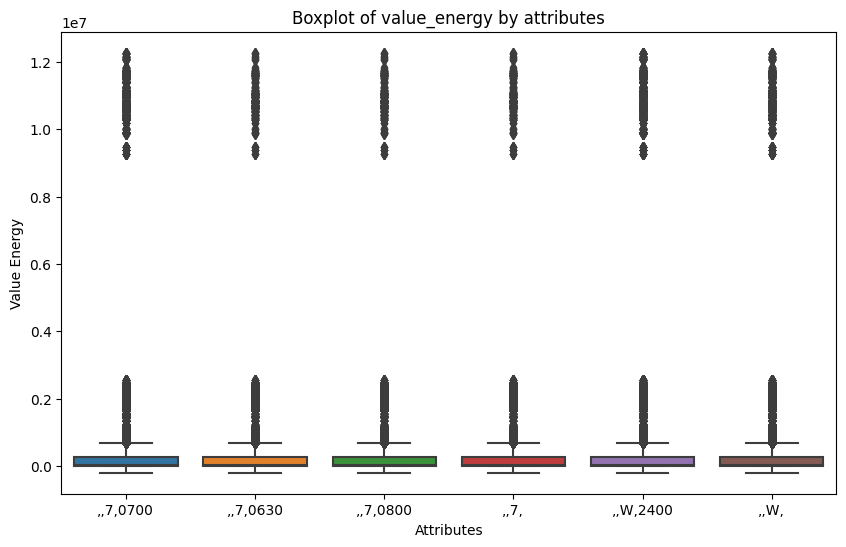

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='attributes', y='value_energy', data=df_combined, ax=ax)
plt.title('Boxplot of value_energy by attributes')
plt.xlabel('Attributes')
plt.ylabel('Value Energy')
plt.show()

### Boxplots (Without Outliers [kind of])

In [14]:
#Removed outliers
df_no_outliers = df_combined[(df_combined['value_energy']<=100000) & (df_combined['value_energy']>=-50000)]

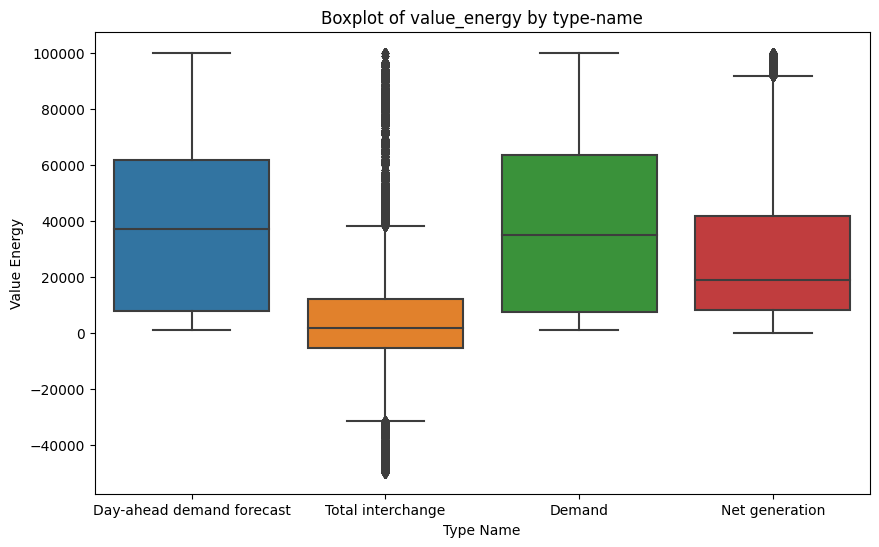

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='type-name', y='value_energy', data=df_no_outliers, ax=ax)
plt.title('Boxplot of value_energy by type-name')
plt.xlabel('Type Name')
plt.ylabel('Value Energy')
plt.show()

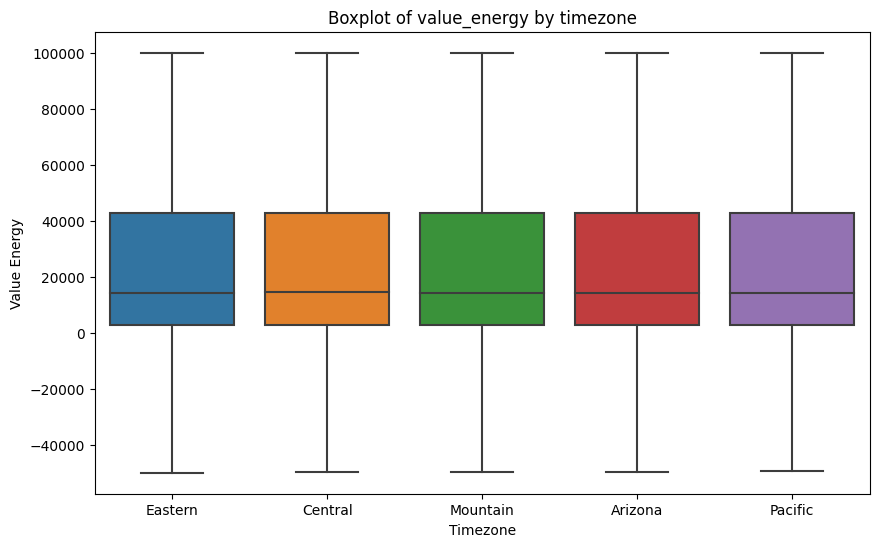

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='timezone', y='value_energy', data=df_no_outliers, ax=ax)
plt.title('Boxplot of value_energy by timezone')
plt.xlabel('Timezone')
plt.ylabel('Value Energy')
plt.show()

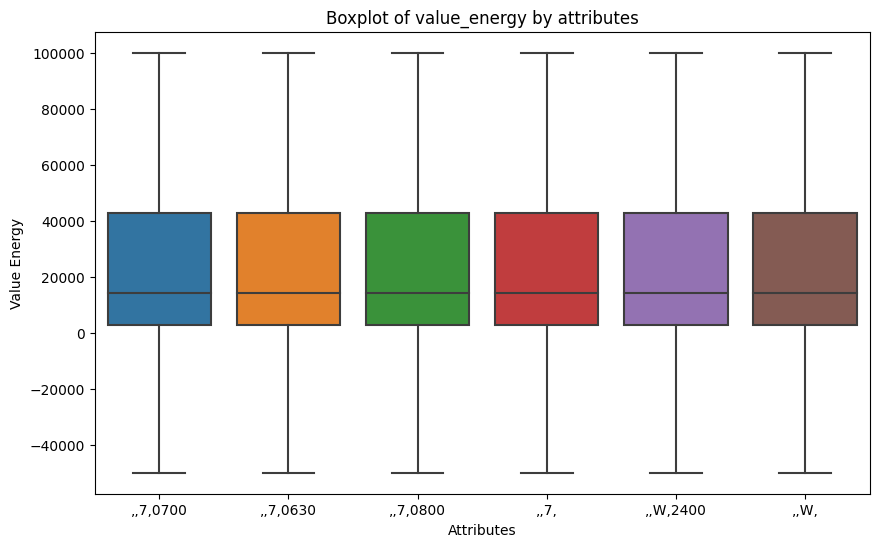

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='attributes', y='value_energy', data=df_no_outliers, ax=ax)
plt.title('Boxplot of value_energy by attributes')
plt.xlabel('Attributes')
plt.ylabel('Value Energy')
plt.show()

### Scatterplots (for correlation)

<Axes: xlabel='value_weather', ylabel='value_energy'>

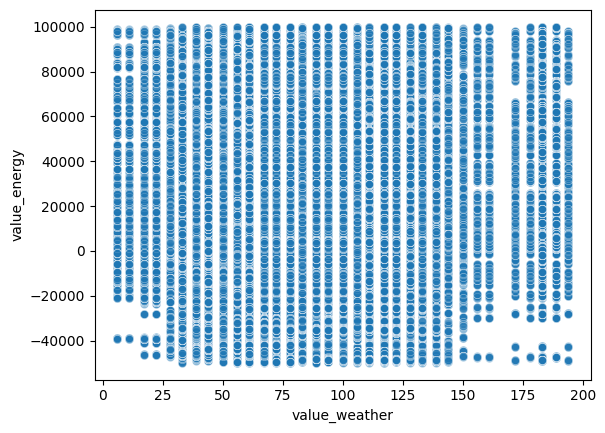

In [18]:
# Scatter plot of selling price vs the present price
sns.scatterplot(x='value_weather', y='value_energy', data=df_no_outliers, alpha=0.5)

In [19]:
df_no_outliers

,type-name,timezone,value_energy,station,attributes,value_weather
0,Day-ahead demand forecast,Eastern,42020,GHCND:USC00280907,",,7,0700",94
1,Day-ahead demand forecast,Eastern,42020,GHCND:USC00281335,",,7,0700",111
2,Day-ahead demand forecast,Eastern,42020,GHCND:USC00283704,",,7,0700",117
3,Day-ahead demand forecast,Eastern,42020,GHCND:USC00284987,",,7,0630",133
4,Day-ahead demand forecast,Eastern,42020,GHCND:USC00301309,",,7,0700",122
...,...,...,...,...,...,...
658910,Total interchange,Central,3720,GHCND:USW00054787,",,W,",67
658911,Total interchange,Central,3720,GHCND:USW00094728,",,W,2400",100
658912,Total interchange,Central,3720,GHCND:USW00094741,",,W,",89
658913,Total interchange,Central,3720,GHCND:USW00094745,",,W,2400",78


### Histograms

<Axes: xlabel='value_energy', ylabel='Count'>

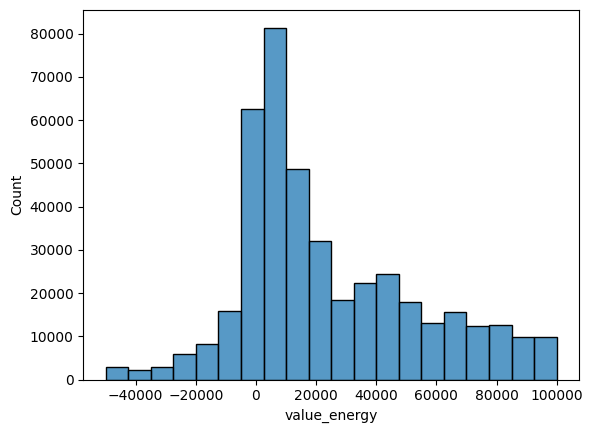

In [20]:
# Histogram of Energy
sns.histplot(df_no_outliers['value_energy'], bins=20)

<Axes: xlabel='value_weather', ylabel='Count'>

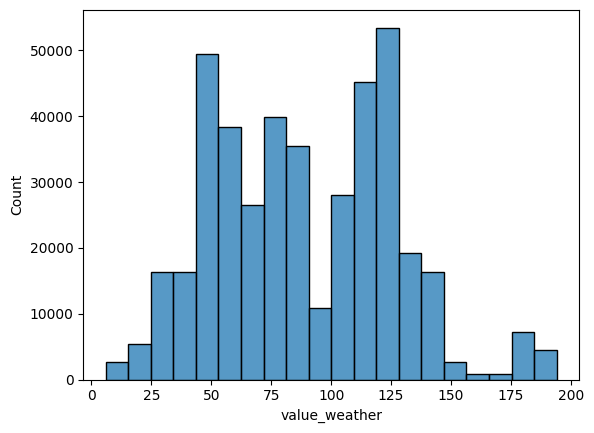

In [21]:
# Histogram of Weather
sns.histplot(df_no_outliers['value_weather'], bins=20)

## Feature Engineering

In [22]:
df_combined.head()

,type-name,timezone,value_energy,station,attributes,value_weather
0,Day-ahead demand forecast,Eastern,42020,GHCND:USC00280907,",,7,0700",94
1,Day-ahead demand forecast,Eastern,42020,GHCND:USC00281335,",,7,0700",111
2,Day-ahead demand forecast,Eastern,42020,GHCND:USC00283704,",,7,0700",117
3,Day-ahead demand forecast,Eastern,42020,GHCND:USC00284987,",,7,0630",133
4,Day-ahead demand forecast,Eastern,42020,GHCND:USC00301309,",,7,0700",122


In [50]:
#One Hot Encode categorical columns
df_prep = pd.get_dummies(df_combined, columns=['type-name', 'timezone', 'station','attributes'], drop_first=False, dtype=int)

In [51]:
df_prep.head()

,value_energy,value_weather,type-name_Day-ahead demand forecast,type-name_Demand,type-name_Net generation,type-name_Total interchange,timezone_Arizona,timezone_Central,timezone_Eastern,timezone_Mountain,...,station_GHCND:USW00094728,station_GHCND:USW00094741,station_GHCND:USW00094745,station_GHCND:USW00094789,"attributes_,,7,","attributes_,,7,0630","attributes_,,7,0700","attributes_,,7,0800","attributes_,,W,","attributes_,,W,2400"
0,42020,94,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,42020,111,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,42020,117,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,42020,133,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,42020,122,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## Train, Test, Split

In [52]:
#Split data into training and testing
X = df_prep.drop('value_energy', axis=1)
y = df_prep['value_energy']

#Apply standard scaler (for the weather value)
ss = StandardScaler()
X_scaled = ss.fit_transform(X=X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Select best model and fine tune hyperparameters

In [26]:
lr = LinearRegression()
ls = Lasso()
rg = Ridge(alpha=10)
en = ElasticNet()
models = [(lr, 'Linear Regression'),
           (ls, 'Lasso'),
           (rg, "Ridge Regression"),
           (en, "Elastic Net")]

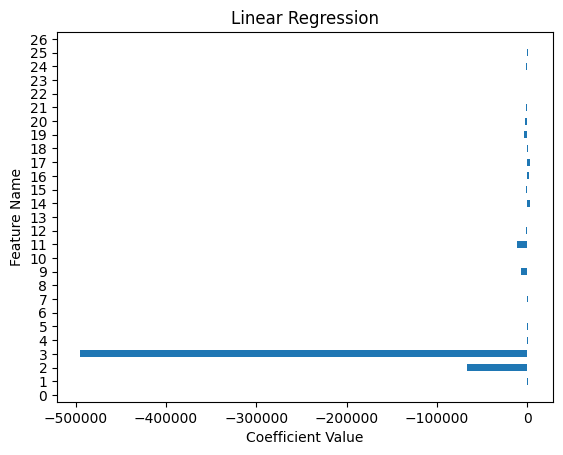

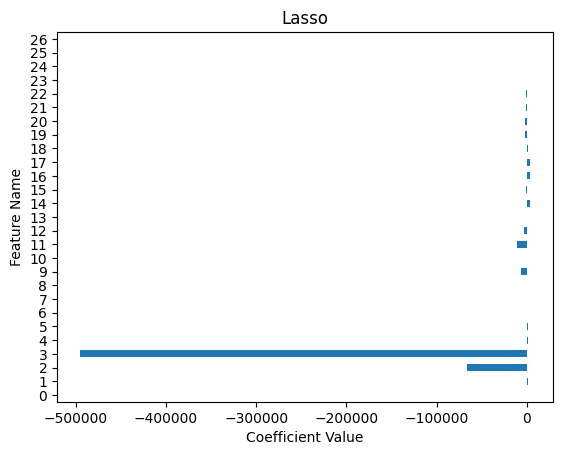

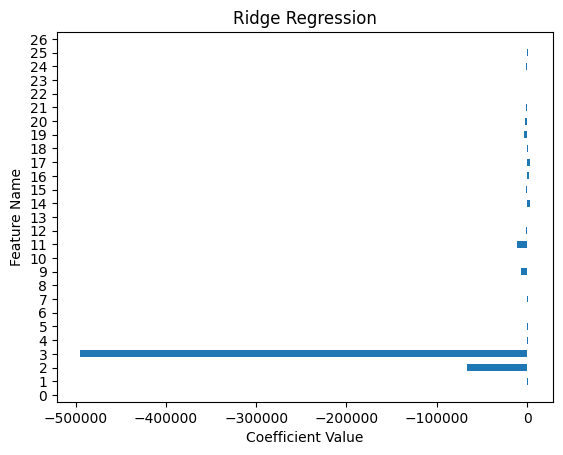

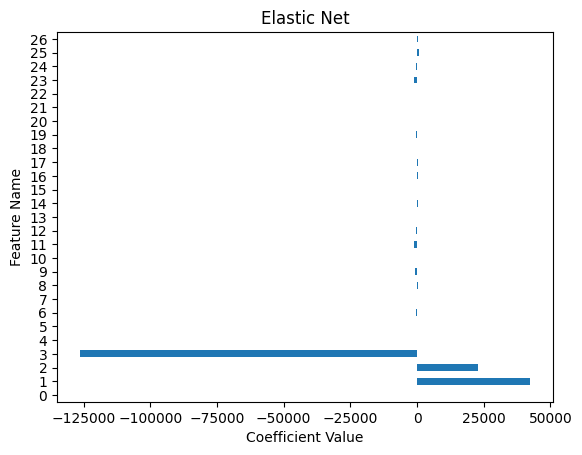

In [27]:
# Create an empty data frame
df_feat = pd.DataFrame()
for model in models:
    model[0].fit(X_train, y_train)
    pd.Series(model[0].coef_).plot(kind='barh')
    plt.title(model[1])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.show()

    column_name = model[1]

    df_feat[column_name] = model[0].coef_

In [28]:
df_feat

,Linear Regression,Lasso,Ridge Regression,Elastic Net
0,-133.243509,-133.251744,-133.244178,-128.494079
1,1325.141820,1325.283424,1377.376951,42548.623999
2,-66358.066590,-66349.908335,-66300.313884,22778.795412
3,-495619.125948,-495611.035761,-495526.493782,-126541.180595
4,778.356133,763.320217,778.073407,158.676848
5,721.487826,706.534788,721.139856,92.886004
6,-309.301312,-314.313862,-309.509841,-232.743335
7,482.635584,467.638696,482.334883,-7.108620
8,-133.893451,-58.342133,-127.963896,235.357885
9,-6735.676933,-6660.237754,-6727.643368,-577.206458


Linear Regression Metrics - Actual vs. Predicted
---------------------------------------------------------
R2: 0.030808280212600292
MSE: 1385201746088.1682


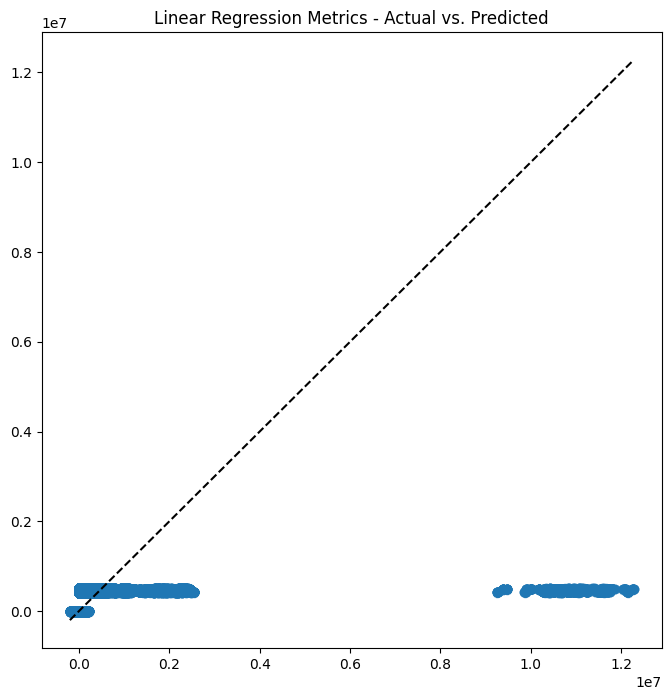


Lasso Regression Metrics - Actual vs. Predicted
---------------------------------------------------------
R2: 0.030808506745054864
MSE: 1385201422320.285


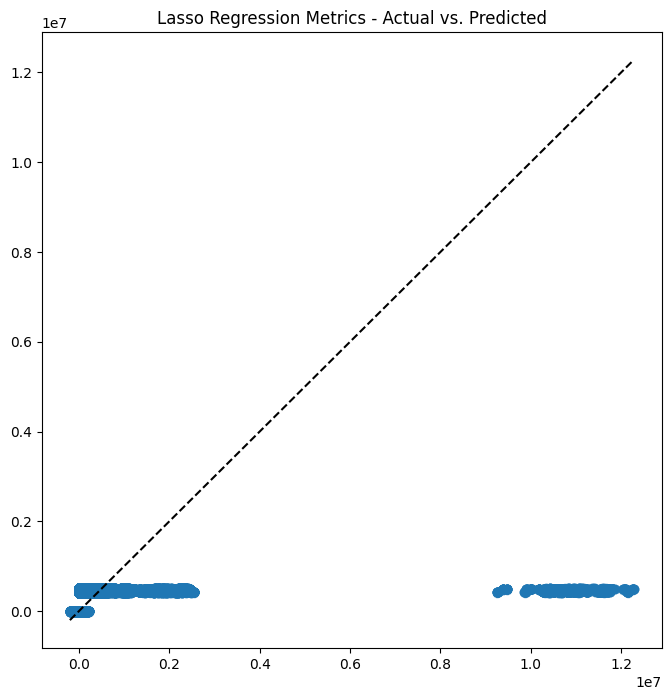


Ridge Regression Metrics - Actual vs. Predicted
---------------------------------------------------------
R2: 0.030808370937307927
MSE: 1385201616421.3328


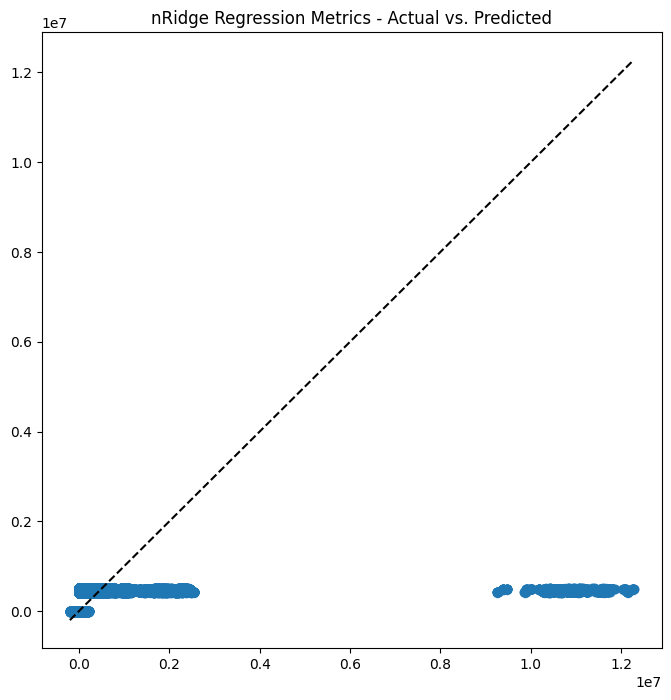


Elastic Net Regression Metrics - Actual vs. Predicted
---------------------------------------------------------
R2: 0.0159552807338329
MSE: 1406430157755.9324


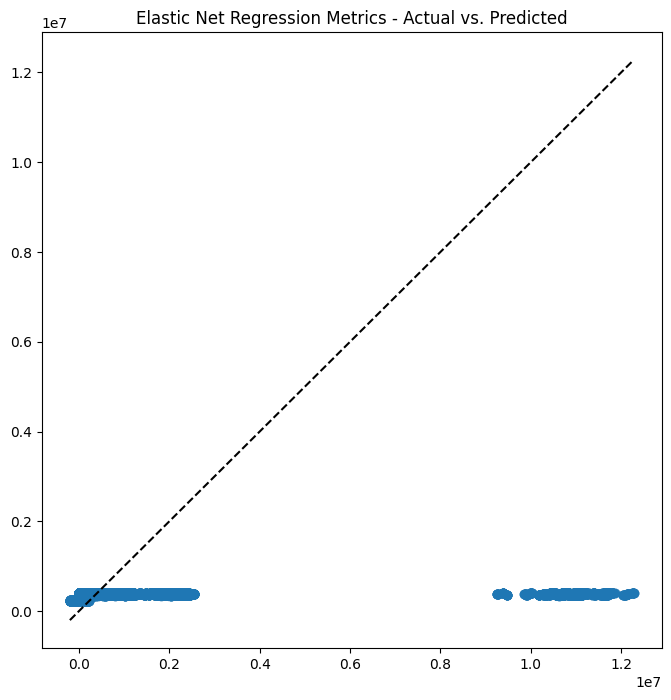

In [29]:
# Calculate and print peformance metrics along with graph
def evaluate_model(name,model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"R2: {r2}")
    print(f"MSE: {mse}")


    # Create a scatter plot
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(y_test, y_pred, alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    ax.set_title(name)
    plt.show()

    
print("Linear Regression Metrics - Actual vs. Predicted")
print("---------------------------------------------------------")
evaluate_model("Linear Regression Metrics - Actual vs. Predicted",lr, X_test, y_test)
print()


print("Lasso Regression Metrics - Actual vs. Predicted")
print("---------------------------------------------------------")
evaluate_model("Lasso Regression Metrics - Actual vs. Predicted",ls, X_test, y_test)
print()


print("Ridge Regression Metrics - Actual vs. Predicted")
print("---------------------------------------------------------")
evaluate_model("nRidge Regression Metrics - Actual vs. Predicted",rg, X_test, y_test)
print()


print("Elastic Net Regression Metrics - Actual vs. Predicted")
print("---------------------------------------------------------")
evaluate_model("Elastic Net Regression Metrics - Actual vs. Predicted",en, X_test , y_test)

/Users/oanottage/opt/anaconda3/envs/energyvenv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


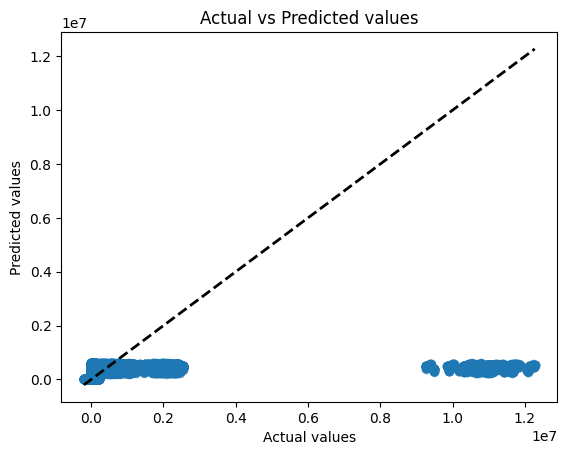

In [30]:
from sklearn.neural_network import MLPRegressor

# create an instance of MLPRegressor with 2 hidden layers of 10 neurons each
regressor = MLPRegressor(hidden_layer_sizes=(10, 10))

# fit the regressor to the training data
regressor.fit(X_train, y_train)

# make predictions on the test data
y_pred = regressor.predict(X_test)

# create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)

# add a regression line to the plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

# set the labels for the x-axis and y-axis
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# add a title to the plot
plt.title('Actual vs Predicted values')

# show the plot
plt.show()


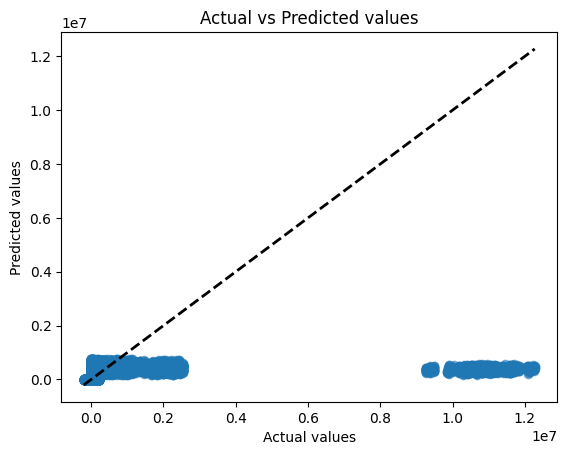

In [53]:
#THIS IS THE MODEL I WILL USE FOR THE FLASK APPLICATION

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# create an instance of RandomForestRegressor and fit it to the data
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)

# make predictions on the test data
y_pred = regressor.predict(X_test)

# create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)

# add a regression line to the plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

# set the labels for the x-axis and y-axis
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# add a title to the plot
plt.title('Actual vs Predicted values')

# show the plot
plt.show()


In [54]:
# save the model to disk
filename = 'random_forest_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [55]:
for i in X_train.columns:
  print(i)

value_weather
type-name_Day-ahead demand forecast
type-name_Demand
type-name_Net generation
type-name_Total interchange
timezone_Arizona
timezone_Central
timezone_Eastern
timezone_Mountain
timezone_Pacific
station_GHCND:USC00280907
station_GHCND:USC00281335
station_GHCND:USC00283704
station_GHCND:USC00284987
station_GHCND:USC00301309
station_GHCND:USC00308577
station_GHCND:USC00309580
station_GHCND:USW00014732
station_GHCND:USW00014734
station_GHCND:USW00054743
station_GHCND:USW00054787
station_GHCND:USW00094728
station_GHCND:USW00094741
station_GHCND:USW00094745
station_GHCND:USW00094789
attributes_,,7,
attributes_,,7,0630
attributes_,,7,0700
attributes_,,7,0800
attributes_,,W,
attributes_,,W,2400
